<a href="https://colab.research.google.com/github/kyeonghaeone/ITB2022/blob/main/%EB%B6%84%EB%A5%98%EA%B3%BC%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [114]:
#시각화 한글깨짐 해결위한 폰트
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 5 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent 

In [115]:
!pip install mglearn 
!pip install --upgrade joblib==1.1.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [116]:
import mglearn
from google.colab import drive
drive.mount('/content/drive')
%matplotlib inline
import pandas as pd
import seaborn as sns          
import matplotlib.pyplot as plt
import numpy as np        
import matplotlib as mpl

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).



#데이터 불러오기 및 탐색

In [117]:
health = pd.read_csv("/content/drive/My Drive/Colab Notebooks/ITB/health_data.csv", encoding='utf-8')
display(health.head()) 
print(health.info()) 
print(health.describe())

,기준년도,가입자일련번호,시도코드,성별코드,연령대코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,치석,데이터공개일자
0,2020,1,36,M,9,165,60,72.1,1.2,1.5,...,1.1,21.0,27.0,21.0,No,No,0,NaN,NaN,12/29/2021
1,2020,2,27,F,13,150,65,81.0,0.8,0.8,...,0.5,18.0,15.0,15.0,No,No,0,NaN,NaN,12/29/2021
2,2020,3,11,F,12,155,55,70.0,0.6,0.7,...,0.7,27.0,25.0,7.0,No,No,0,NaN,NaN,12/29/2021
3,2020,4,31,M,13,160,70,90.8,1.0,1.0,...,1.2,65.0,97.0,72.0,No,No,1,0.0,0.0,12/29/2021
4,2020,5,41,F,12,155,50,75.2,1.5,1.2,...,0.7,18.0,17.0,14.0,No,No,0,NaN,NaN,12/29/2021


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   기준년도         10000 non-null  int64  
 1   가입자일련번호      10000 non-null  int64  
 2   시도코드         10000 non-null  int64  
 3   성별코드         10000 non-null  object 
 4   연령대코드(5세단위)  10000 non-null  int64  
 5   신장(5Cm단위)    10000 non-null  int64  
 6   체중(5Kg 단위)   10000 non-null  int64  
 7   허리둘레         10000 non-null  float64
 8   시력(좌)        10000 non-null  float64
 9   시력(우)        10000 non-null  float64
 10  청력(좌)        10000 non-null  int64  
 11  청력(우)        10000 non-null  int64  
 12  수축기혈압        9912 non-null   float64
 13  이완기혈압        9912 non-null   float64
 14  식전혈당(공복혈당)   9912 non-null   float64
 15  총콜레스테롤       4044 non-null   float64
 16  트리글리세라이드     4044 non-null   float64
 17  HDL콜레스테롤     4044 non-null   float64
 18  LDL콜레스테롤     3977 non-null   float64
 19  혈색소  

In [118]:
health.describe()

,기준년도,가입자일련번호,시도코드,연령대코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),청력(좌),...,LDL콜레스테롤,혈색소,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,구강검진수검여부,치아우식증유무,치석
count,10000.0,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,3977.000000,9912.000000,9861.000000,9912.000000,9912.00000,9912.000000,9912.000000,10000.000000,3251.000000,3251.000000
mean,2020.0,5000.50000,34.100100,11.931400,160.983500,63.034500,82.366100,0.933750,0.936750,1.050500,...,116.263264,14.214255,1.119461,0.848484,27.58979,26.789851,38.098668,0.325100,0.175331,0.579514
std,0.0,2886.89568,12.394581,2.166048,9.211608,12.205294,9.561973,0.662057,0.641378,0.227936,...,37.829955,1.555386,0.489782,0.301012,17.88442,23.735687,58.184579,0.468436,0.380308,0.591269
min,2020.0,1.00000,11.000000,9.000000,130.000000,30.000000,53.000000,0.100000,0.100000,1.000000,...,13.000000,5.100000,1.000000,0.050000,3.00000,2.000000,3.000000,0.000000,0.000000,0.000000
25%,2020.0,2500.75000,27.000000,10.000000,155.000000,55.000000,76.000000,0.700000,0.700000,1.000000,...,89.000000,13.200000,1.000000,0.700000,20.00000,16.000000,16.000000,0.000000,0.000000,0.000000
50%,2020.0,5000.50000,41.000000,12.000000,160.000000,60.000000,82.000000,0.900000,0.900000,1.000000,...,115.000000,14.200000,1.000000,0.800000,24.00000,21.000000,24.000000,0.000000,0.000000,1.000000
75%,2020.0,7500.25000,44.000000,13.000000,170.000000,70.000000,88.900000,1.200000,1.200000,1.000000,...,141.000000,15.300000,1.000000,1.000000,30.00000,31.000000,39.000000,1.000000,0.000000,1.000000
max,2020.0,10000.00000,49.000000,18.000000,195.000000,130.000000,134.000000,9.900000,9.900000,3.000000,...,297.000000,20.000000,6.000000,9.200000,692.00000,1146.000000,2322.000000,1.000000,1.000000,2.000000


###비만도에 따라 분류
###bmi 파생변수 만들기

In [119]:
#변수명 바꾸기
health_new = health.copy()
health_new = health_new.rename(columns = {'체중(5Kg 단위)' : '체중'})
health_new = health_new.rename(columns = {'신장(5Cm단위)' : '신장'})

#파생변수 만들기 비만도 
health_new['bmi'] = health_new['체중'] / (health_new['신장']/100)**2
health_new['bmi_grade'] = np.where(health_new['bmi']>=35, '고도비만',
                          np.where(health_new['bmi']>=30, '2비만',
                          np.where(health_new['bmi']>=25, '1비만',
                          np.where(health_new['bmi']>=23, '과체중',
                          np.where(health_new['bmi']>=18.6, '정상','저체중')))))
display(health_new.head())

,기준년도,가입자일련번호,시도코드,성별코드,연령대코드(5세단위),신장,체중,허리둘레,시력(좌),시력(우),...,(혈청지오티)ALT,감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,치석,데이터공개일자,bmi,bmi_grade
0,2020,1,36,M,9,165,60,72.1,1.2,1.5,...,27.0,21.0,No,No,0,NaN,NaN,12/29/2021,22.038567,정상
1,2020,2,27,F,13,150,65,81.0,0.8,0.8,...,15.0,15.0,No,No,0,NaN,NaN,12/29/2021,28.888889,1비만
2,2020,3,11,F,12,155,55,70.0,0.6,0.7,...,25.0,7.0,No,No,0,NaN,NaN,12/29/2021,22.892820,정상
3,2020,4,31,M,13,160,70,90.8,1.0,1.0,...,97.0,72.0,No,No,1,0.0,0.0,12/29/2021,27.343750,1비만
4,2020,5,41,F,12,155,50,75.2,1.5,1.2,...,17.0,14.0,No,No,0,NaN,NaN,12/29/2021,20.811655,정상


##결측치 처리

In [120]:
display(health_new.shape) 
display(health_new.info()) 
display(health_new.isna().sum())

(10000, 33)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 33 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   기준년도         10000 non-null  int64  
 1   가입자일련번호      10000 non-null  int64  
 2   시도코드         10000 non-null  int64  
 3   성별코드         10000 non-null  object 
 4   연령대코드(5세단위)  10000 non-null  int64  
 5   신장           10000 non-null  int64  
 6   체중           10000 non-null  int64  
 7   허리둘레         10000 non-null  float64
 8   시력(좌)        10000 non-null  float64
 9   시력(우)        10000 non-null  float64
 10  청력(좌)        10000 non-null  int64  
 11  청력(우)        10000 non-null  int64  
 12  수축기혈압        9912 non-null   float64
 13  이완기혈압        9912 non-null   float64
 14  식전혈당(공복혈당)   9912 non-null   float64
 15  총콜레스테롤       4044 non-null   float64
 16  트리글리세라이드     4044 non-null   float64
 17  HDL콜레스테롤     4044 non-null   float64
 18  LDL콜레스테롤     3977 non-null   float64
 19  혈색소  

None

기준년도              0
가입자일련번호           0
시도코드              0
성별코드              0
연령대코드(5세단위)       0
신장                0
체중                0
허리둘레              0
시력(좌)             0
시력(우)             0
청력(좌)             0
청력(우)             0
수축기혈압            88
이완기혈압            88
식전혈당(공복혈당)       88
총콜레스테롤         5956
트리글리세라이드       5956
HDL콜레스테롤       5956
LDL콜레스테롤       6023
혈색소              88
요단백             139
혈청크레아티닌          88
(혈청지오티)AST       88
(혈청지오티)ALT       88
감마지티피            88
흡연상태              2
음주여부              1
구강검진수검여부          0
치아우식증유무        6749
치석             6749
데이터공개일자           0
bmi               0
bmi_grade         0
dtype: int64

In [121]:
#허리둘레 결측치 88개, 얼마안되니 제거
health_new = health_new.dropna(subset = ['허리둘레'], axis=0)  
display(health_new.isna().sum())

기준년도              0
가입자일련번호           0
시도코드              0
성별코드              0
연령대코드(5세단위)       0
신장                0
체중                0
허리둘레              0
시력(좌)             0
시력(우)             0
청력(좌)             0
청력(우)             0
수축기혈압            88
이완기혈압            88
식전혈당(공복혈당)       88
총콜레스테롤         5956
트리글리세라이드       5956
HDL콜레스테롤       5956
LDL콜레스테롤       6023
혈색소              88
요단백             139
혈청크레아티닌          88
(혈청지오티)AST       88
(혈청지오티)ALT       88
감마지티피            88
흡연상태              2
음주여부              1
구강검진수검여부          0
치아우식증유무        6749
치석             6749
데이터공개일자           0
bmi               0
bmi_grade         0
dtype: int64

##이상치 확인 및 처리

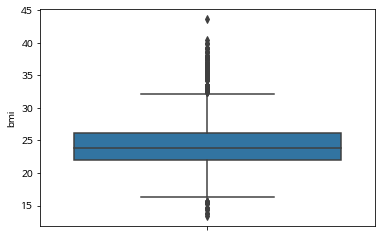

In [122]:
sns.boxplot(data = health_new, y = 'bmi')

In [123]:
###이상치 처리
pct25 = health_new['bmi'].quantile(.25)
print(pct25) #22.04 (셋째자리에서반올림)
pct75 = health_new['bmi'].quantile(.75)
print(pct75) #26.12 (셋째자리에서반올림)
iqr = pct75 - pct25

22.03856749311295
26.122448979591837


In [124]:
#상한하한구하기
ll = pct25 - 1.5*iqr
print(ll) #15.91
ul = pct75 + 1.5*iqr
print(ul) #32.25
#이상치 결정할 상한값 하한값이 구해졌으나 저체중의 기준이 18.5미만이고, 고도비만의 기준이 35이상이므로 
#하한값은 사용할만 하나 상한값을 이상치에 적용 시, 고도비만은 존재하지 않게 되므로 하한만 적용하겠다. 상한은 임의로 40으로 정한다.

15.91274526339462
32.24827120931017


In [125]:
#이상치 있는 행 결측처리하고 제거
health_new['bmi'] = np.where((health_new['bmi']<15.91) | (health_new['bmi']>40), np.nan, health_new['bmi'])  
display(health_new.isna().sum()) #25개 제거
health_new = health_new.dropna(subset = ['bmi'], axis=0)
display(health_new.isna().sum())

기준년도              0
가입자일련번호           0
시도코드              0
성별코드              0
연령대코드(5세단위)       0
신장                0
체중                0
허리둘레              0
시력(좌)             0
시력(우)             0
청력(좌)             0
청력(우)             0
수축기혈압            88
이완기혈압            88
식전혈당(공복혈당)       88
총콜레스테롤         5956
트리글리세라이드       5956
HDL콜레스테롤       5956
LDL콜레스테롤       6023
혈색소              88
요단백             139
혈청크레아티닌          88
(혈청지오티)AST       88
(혈청지오티)ALT       88
감마지티피            88
흡연상태              2
음주여부              1
구강검진수검여부          0
치아우식증유무        6749
치석             6749
데이터공개일자           0
bmi              25
bmi_grade         0
dtype: int64

기준년도              0
가입자일련번호           0
시도코드              0
성별코드              0
연령대코드(5세단위)       0
신장                0
체중                0
허리둘레              0
시력(좌)             0
시력(우)             0
청력(좌)             0
청력(우)             0
수축기혈압            87
이완기혈압            87
식전혈당(공복혈당)       87
총콜레스테롤         5942
트리글리세라이드       5942
HDL콜레스테롤       5942
LDL콜레스테롤       6009
혈색소              87
요단백             138
혈청크레아티닌          87
(혈청지오티)AST       87
(혈청지오티)ALT       87
감마지티피            87
흡연상태              2
음주여부              1
구강검진수검여부          0
치아우식증유무        6734
치석             6734
데이터공개일자           0
bmi               0
bmi_grade         0
dtype: int64

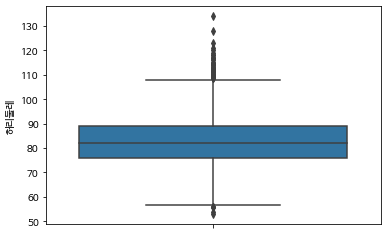

In [126]:
#허리둘레는 상자그래프로 너무 말이 안되는 이상치 있는지만 확인하고 bmi의 이상치제거를 따라간다.(고도비만을 삭제할 가능성이 있으므로)
sns.boxplot(data = health_new, y = '허리둘레')

In [127]:
#상자그림보고 가장 위에 두개는 좀 이상하니까 이상치로 판정 #125 기준으로 하면 벗어남 #제거
len(health_new.loc[(health_new['허리둘레'] > 125)])
health_new['허리둘레'] = np.where((health_new['허리둘레']>125), np.nan, health_new['허리둘레'])  
health_new = health_new.dropna(subset = ['허리둘레'], axis=0)

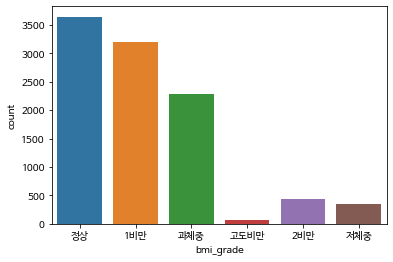

In [128]:
#bmi_grade 빈도 확인 어떤 범주 표본이 많은지
sns.countplot(data = health_new, x = 'bmi_grade') 

##의사결정나무

sklearn돌리기 위해 모두 1,0으로 바꾸고 변수 삭제하거나 na대체

In [129]:
#파생변수 만들기 비만(1비만이상)/비만아님
health_new['비만여부'] = np.where(health_new['bmi']>=25, 'O','X')

In [130]:
#문자들 이진으로 변환

from sklearn.preprocessing import LabelEncoder
health_new["성별"] = LabelEncoder().fit_transform(health_new["성별코드"])
health_new["흡연"] = LabelEncoder().fit_transform(health_new["흡연상태"])
health_new["음주"] = LabelEncoder().fit_transform(health_new["음주여부"])
health_new["비만여부"] = LabelEncoder().fit_transform(health_new["비만여부"])
health_new = health_new.drop(['성별코드','흡연상태','음주여부','데이터공개일자','기준년도','시도코드','bmi_grade'], axis=1)

display(health_new.head())

,가입자일련번호,연령대코드(5세단위),신장,체중,허리둘레,시력(좌),시력(우),청력(좌),청력(우),수축기혈압,...,(혈청지오티)ALT,감마지티피,구강검진수검여부,치아우식증유무,치석,bmi,비만여부,성별,흡연,음주
0,1,9,165,60,72.1,1.2,1.5,1,1,127.0,...,27.0,21.0,0,NaN,NaN,22.038567,1,1,0,0
1,2,13,150,65,81.0,0.8,0.8,1,1,110.0,...,15.0,15.0,0,NaN,NaN,28.888889,0,0,0,0
2,3,12,155,55,70.0,0.6,0.7,1,1,123.0,...,25.0,7.0,0,NaN,NaN,22.892820,1,0,0,0
3,4,13,160,70,90.8,1.0,1.0,1,2,134.0,...,97.0,72.0,1,0.0,0.0,27.343750,0,1,0,0
4,5,12,155,50,75.2,1.5,1.2,1,1,144.0,...,17.0,14.0,0,NaN,NaN,20.811655,1,0,0,0


In [131]:
health_new = health_new.fillna(health_new.mean())

In [132]:
display(health_new.isna().sum())

가입자일련번호        0
연령대코드(5세단위)    0
신장             0
체중             0
허리둘레           0
시력(좌)          0
시력(우)          0
청력(좌)          0
청력(우)          0
수축기혈압          0
이완기혈압          0
식전혈당(공복혈당)     0
총콜레스테롤         0
트리글리세라이드       0
HDL콜레스테롤       0
LDL콜레스테롤       0
혈색소            0
요단백            0
혈청크레아티닌        0
(혈청지오티)AST     0
(혈청지오티)ALT     0
감마지티피          0
구강검진수검여부       0
치아우식증유무        0
치석             0
bmi            0
비만여부           0
성별             0
흡연             0
음주             0
dtype: int64

In [133]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

X = health_new.iloc[:, 1:]  
#y = health_new.iloc[:, 0]   # target 변수 비만 
y = health_new['비만여부']

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, stratify=y, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)

print("학습용 데이터 정확도: {:.3f}".format(tree.score(X_train, y_train)))
print("시험용 데이터 정확도: {:.3f}".format(tree.score(X_test, y_test)))

학습용 데이터 정확도: 1.000
시험용 데이터 정확도: 1.000


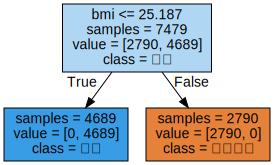

In [134]:

from sklearn.tree import export_graphviz
import graphviz

export_graphviz(tree, out_file="tree.dot", class_names=[ "비만아님", "비만"],
                feature_names=health_new.columns[1:], impurity=False, filled=True)

with open("tree.dot") as f:
    dot_graph = f.read()

display(graphviz.Source(dot_graph))

### 전처리도,, 인코딩도 구글링으로 열심히 했는데 계속 깊이가 1밖에 안되어서,,,계속 고민하다 시간이 늦어 제출합니다...

In [135]:
result = tree.feature_importances_
print("변수의 중요도:\n", result)

변수의 중요도:
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 1. 0. 0. 0. 0.]


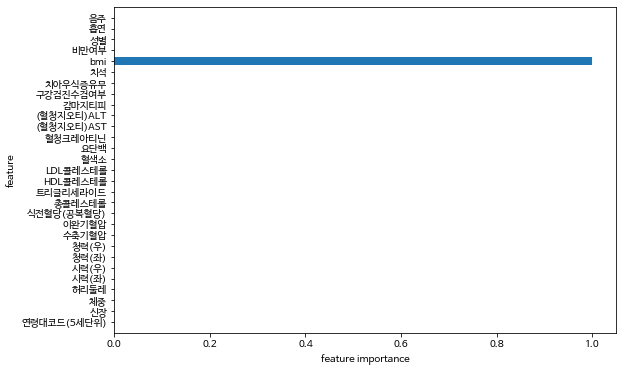

In [136]:
import numpy as np

def plot_feature_importances_health_new(model):
    plt.rcParams["figure.figsize"] = (9,6)
    n_features = len(health_new.columns[1:])  
    plt.barh(np.arange(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), health_new.columns[1:]) 
    plt.xlabel("feature importance")
    plt.ylabel("feature")
    plt.ylim(-1, n_features) 

plot_feature_importances_health_new(tree)

In [137]:
res = pd.DataFrame(result)
res["name"] = health_new.columns[1:]
display(res.info())
 
display(res.sort_values(by='name'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       29 non-null     float64
 1   name    29 non-null     object 
dtypes: float64(1), object(1)
memory usage: 592.0+ bytes


None

,0,name
19,0.0,(혈청지오티)ALT
18,0.0,(혈청지오티)AST
13,0.0,HDL콜레스테롤
14,0.0,LDL콜레스테롤
24,1.0,bmi
20,0.0,감마지티피
21,0.0,구강검진수검여부
25,0.0,비만여부
26,0.0,성별
8,0.0,수축기혈압


##랜덤포레스트

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


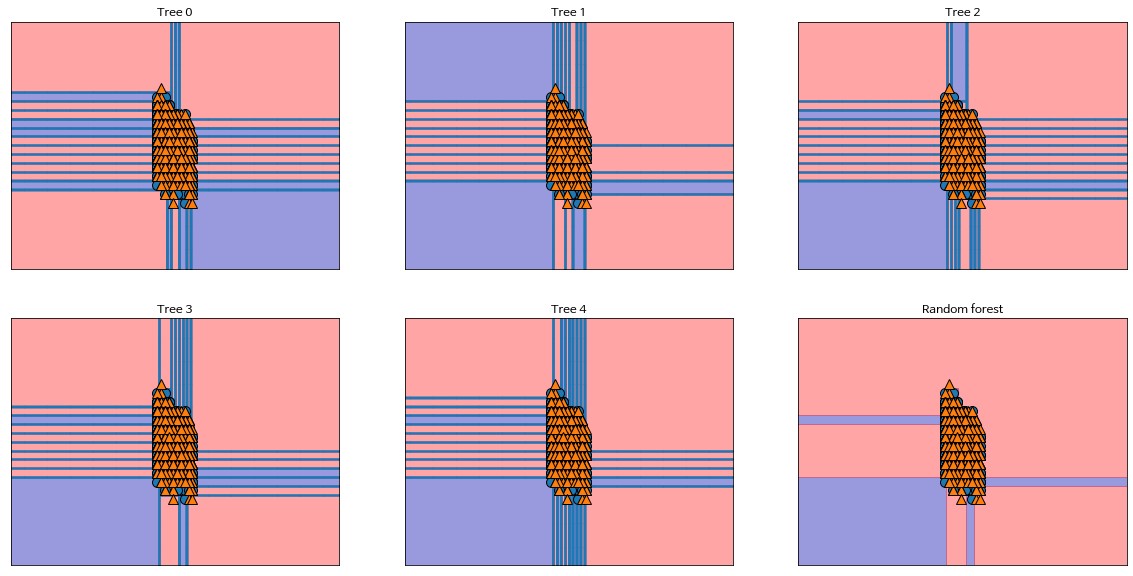

In [138]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=5, random_state=2)
forest.fit(X_train.iloc[:, 0:2], y_train)

fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title("Tree {}".format(i))
    mglearn.plots.plot_tree_partition(X.iloc[:, 0:2].values, y, tree, ax=ax)
    
mglearn.plots.plot_2d_separator(forest, X.iloc[:, 0:2].values, fill=True, ax=axes[-1, -1], alpha=.4)
axes[-1, -1].set_title("Random forest")
mglearn.discrete_scatter(X.iloc[:, 0], X.iloc[:, 1], y)
plt.show()

In [139]:
# 30개 변수를 모두 이용하여 100개의 나무 생성 (정확도가 높아짐)

forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)

print("학습용 데이터 세트 정확도: {:.3f}".format(forest.score(X_train, y_train)))
print("시험용 데이터 세트 정확도: {:.3f}".format(forest.score(X_test, y_test)))

학습용 데이터 세트 정확도: 1.000
시험용 데이터 세트 정확도: 1.000


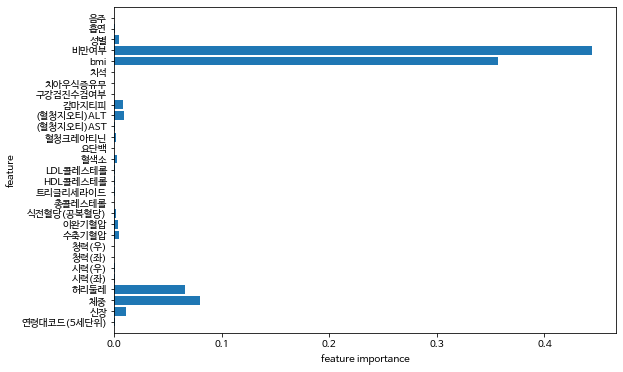

In [140]:
plot_feature_importances_health_new(forest)


감마gtp가 외부의 화학물질에 대응해 담즙을 만들어내는 것과 관련된 수치라는 것을 알게되었다. 현대사회에서 유해화학물질을 섭취하는 가장 큰 경로는 식습관이다.수치가 높을수록 고혈압, 암, 뇌졸증 등 만성퇴행성질환의 대부분과 관련이 있다.

감마gtp 수치는 동물성 식품을 많이 먹을수록 높다. 왜냐하면 유해화학물질은 지방에 잘 농축되기 때문이다. 반대로 말하면 식물성 식품을 먹을수록 수치가 낮다는 뜻이다. 식물성 식품위주의 섭취는 칼로리가 낮아 자연스레 체중감량으로 이어질 수 밖에 없다고 생각한다. 이때문에 감마gtp가 비만정도와 상관이 있는 것 같다.

In [141]:
from sklearn.model_selection import cross_val_score


dt_scores = cross_val_score(tree, X_train, y_train, cv=10, scoring='accuracy')  
rf_scores = cross_val_score(forest, X_train, y_train, cv=10, scoring='accuracy')

print("Accuracy")
print("Decision tree: ", dt_scores) 
print("Random forest: ", rf_scores) 

print("Accuracy mean")
print("Decision tree :{:.3f}".format(dt_scores.mean())) 
print("Random forest :{:.3f}".format(rf_scores.mean())) 

Accuracy
Decision tree:  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Random forest:  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Accuracy mean
Decision tree :1.000
Random forest :1.000


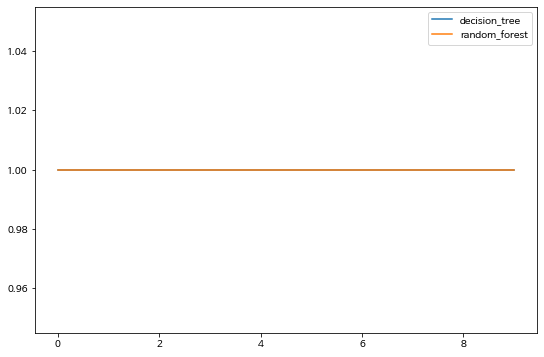

In [142]:
cv_list = [    
            ['decision_tree',dt_scores],
            ['random_forest',rf_scores],
          ]
df = pd.DataFrame.from_dict(dict(cv_list))
df.plot()

##그레디언트부스팅

In [143]:
from sklearn.ensemble import GradientBoostingClassifier


gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)

GradientBoostingClassifier(random_state=0)

In [144]:
print("학습용 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_train, y_train)))
print("시험용 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_test, y_test)))

학습용 데이터 세트 정확도: 1.000
시험용 데이터 세트 정확도: 1.000


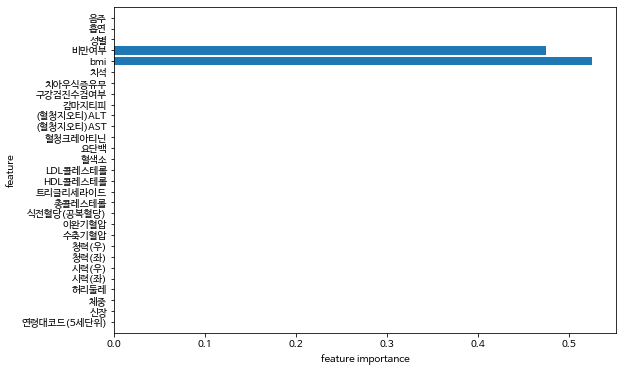

In [145]:
plot_feature_importances_health_new(gbrt)

In [146]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=2)
gbrt.fit(X_train, y_train)

print("학습 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_train, y_train)))
print("시험용 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_test, y_test)))

학습 데이터 세트 정확도: 1.000
시험용 데이터 세트 정확도: 1.000


In [147]:
gbrt = GradientBoostingClassifier(random_state=0, learning_rate=0.01)
gbrt.fit(X_train, y_train)

print("학습 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_train, y_train)))
print("시험용 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_test, y_test)))

학습 데이터 세트 정확도: 1.000
시험용 데이터 세트 정확도: 1.000


#검증

In [148]:
dt_scores = cross_val_score(tree, X_train, y_train, cv=10, scoring='accuracy')  
rf_scores = cross_val_score(forest, X_train, y_train, cv=10, scoring='accuracy')
gbrt_scores = cross_val_score(gbrt, X_train, y_train, cv=10, scoring='accuracy')

print("Accuracy")
print("Decision tree: ", dt_scores) 
print("Random forest: ", rf_scores) 
print("Gradient boosting: ", gbrt_scores) 

print("Accuracy mean")
print("Decision tree :{:.3f}".format(dt_scores.mean())) 
print("Random forest :{:.3f}".format(rf_scores.mean())) 
print("Gradient boosting :{:.3f}".format(gbrt_scores.mean()))

Accuracy
Decision tree:  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Random forest:  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Gradient boosting:  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Accuracy mean
Decision tree :1.000
Random forest :1.000
Gradient boosting :1.000


In [ ]:

from sklearn.model_selection import StratifiedKFold
kf = StratifiedKFold(n_splits=10)

print(kf)

dt_scores = cross_val_score(tree, X_train, y_train, cv=kf, scoring='accuracy')  
rf_scores = cross_val_score(forest, X_train, y_train, cv=kf, scoring='accuracy')
gbrt_scores = cross_val_score(gbrt, X_train, y_train, cv=kf, scoring='accuracy')

print("Accuracy mean -- StratifiedKFold 이용")
print("Decision tree :{:.3f}".format(dt_scores.mean())) 
print("Random forest :{:.3f}".format(rf_scores.mean())) 
print("Gradient boosting :{:.3f}".format(gbrt_scores.mean())) 

StratifiedKFold(n_splits=10, random_state=None, shuffle=False)


In [ ]:
from sklearn.model_selection import GridSearchCV

parameters = {'max_depth':[1,2,3], 'learning_rate':[0.1,0.08, 0.06, 0.04, 0.02]}

In [ ]:
  
init_gbrt = GradientBoostingClassifier(random_state=0)
grid_gbrt = GridSearchCV(init_gbrt, param_grid=parameters, cv=3, refit=True)
print(grid_gbrt)
grid_gbrt.fit(X_train, y_train)

scores_df = pd.DataFrame(grid_gbrt.cv_results_)
scores_df[['params', 'mean_test_score', 'rank_test_score', 'split0_test_score', 'split1_test_score', 'split2_test_score']]

In [ ]:
print('GridSearchCV 최적 파라미터:', grid_gbrt.best_params_)
print('GridSearchCV 최고 정확도: {0:.4f}'.format(grid_gbrt.best_score_))

In [ ]:
print("시험용 데이터 세트 정확도: {:.3f}".format(grid_gbrt.score(X_test, y_test)))

비만에 영향을 미치는 독립변수들을 확인하고 싶어 BMI파생변수를 만들고 진행했는데,, 어째서인지 정확도도 모두 1로 나오고,, 아쉬운 결과가 나왔습니다. 좀 더 잘하고 싶었지만 구글링과 시간에 한계를 느끼며 제출합니다. 